In [2]:
import numpy as np
import pandas as pd

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
trans = pd.read_csv("Transactions.csv")

In [4]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
customers.CustomerID.value_counts()

CustomerID
C0001    1
C0138    1
C0128    1
C0129    1
C0130    1
        ..
C0070    1
C0071    1
C0072    1
C0073    1
C0200    1
Name: count, Length: 200, dtype: int64

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [9]:
trans.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [10]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [11]:
df = pd.merge(trans, customers, on='CustomerID', how='inner').merge(products, on = ['ProductID', 'Price'], how = 'inner')
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [12]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [31]:
df[['CustomerID', 'TotalValue']].groupby('CustomerID')[['TotalValue']].sum().sort_values(by = 'TotalValue' ,ascending = False).head(10).merge(customers, on = 'CustomerID', how= 'inner')

,CustomerID,TotalValue,CustomerName,Region,SignupDate
0,C0141,10673.87,Paul Parsons,Europe,2023-02-23
1,C0054,8040.39,Bruce Rhodes,Asia,2024-09-29
2,C0065,7663.70,Gerald Hines,North America,2024-07-10
3,C0156,7634.45,William Adams,North America,2023-08-19
4,C0082,7572.91,Aimee Taylor,South America,2022-05-13
5,C0188,7111.32,Anna Ball,South America,2022-05-17
6,C0059,7073.28,Mrs. Kimberly Wright,North America,2024-04-07
7,C0028,6819.57,Jennifer Pena,Asia,2024-06-29
8,C0099,6715.72,Rodney Eaton,South America,2023-01-29
9,C0165,6708.10,Juan Mcdaniel,South America,2022-04-09


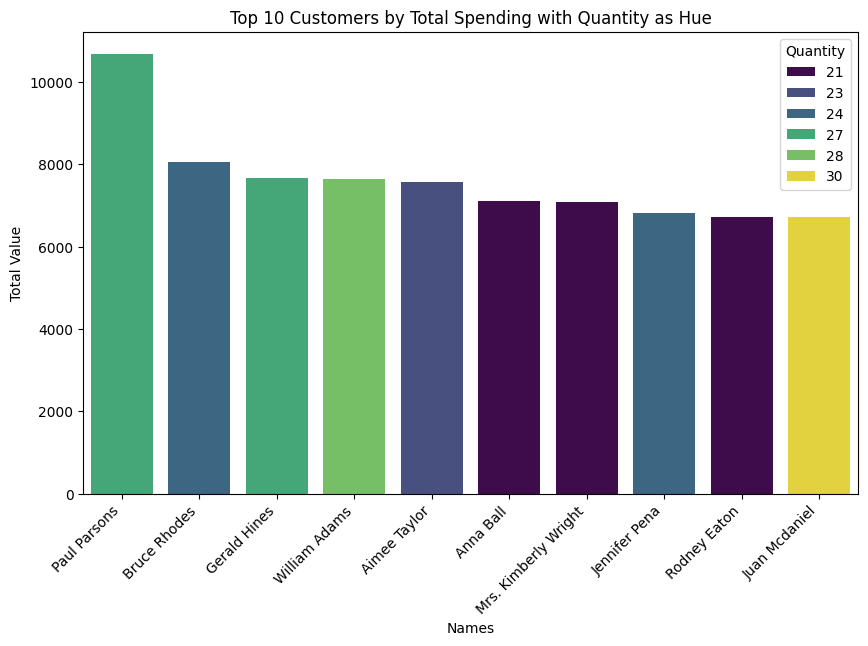

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by CustomerID to sum TotalValue and count the quantity
df_summary = df.groupby('CustomerID').agg(
    TotalValue=('TotalValue', 'sum'),
    Quantity=('Quantity', 'sum')
).sort_values(by='TotalValue', ascending=False).head(10)

# Merging with the customers DataFrame
df_summary = df_summary.merge(customers, on='CustomerID', how='inner')

# Create a bar chart with Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=df_summary, x='CustomerName', y='TotalValue', hue='Quantity', palette='viridis')

# Add labels and title
barplot.set_xlabel('Names')
barplot.set_ylabel('Total Value')
barplot.set_title('Top 10 Customers by Total Spending with Quantity as Hue')
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.show()


In [44]:
df[df.CustomerID == 'C0141'] # BookWorld and ActiveWear - home decor and electroincs
df[df.CustomerID == 'C0054'] # SoundWave - Home decor cloting and electronics
df[df.CustomerID == 'C0065'] # Tech Pro and Home sense
df[df.CustomerID == 'C0156']


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
105,T00190,C0156,P062,2024-09-25 19:36:27,2,748.32,374.16,William Adams,North America,2023-08-19,HomeSense Novel,Books
145,T00699,C0156,P054,2024-04-21 22:39:45,3,171.90,57.30,William Adams,North America,2023-08-19,SoundWave Cookbook,Books
186,T00565,C0156,P007,2024-12-15 0:35:54,2,840.30,420.15,William Adams,North America,2023-08-19,SoundWave Cookbook,Books
344,T00824,C0156,P058,2024-05-20 12:30:20,1,157.62,157.62,William Adams,North America,2023-08-19,ActiveWear Textbook,Books
358,T00984,C0156,P050,2024-05-04 11:33:18,4,1750.60,437.65,William Adams,North America,2023-08-19,ActiveWear Smartwatch,Electronics
405,T00740,C0156,P100,2024-08-24 19:10:31,4,505.36,126.34,William Adams,North America,2023-08-19,HomeSense Sweater,Clothing
473,T00775,C0156,P059,2024-10-05 6:56:28,1,303.20,303.20,William Adams,North America,2023-08-19,SoundWave Jeans,Clothing
476,T00882,C0156,P059,2024-09-21 14:11:57,3,909.60,303.20,William Adams,North America,2023-08-19,SoundWave Jeans,Clothing
639,T00526,C0156,P015,2024-01-01 16:46:56,4,635.72,158.93,William Adams,North America,2023-08-19,HomeSense Headphones,Electronics
718,T00120,C0156,P083,2024-02-27 16:09:00,1,455.72,455.72,William Adams,North America,2023-08-19,ActiveWear Smartwatch,Electronics


In [60]:
df.Category.value_counts().index

Index(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype='object', name='Category')

In [71]:
for col in df.Category.value_counts().index[0:1]:
    print(df[['ProductName', 'Category']].groupby('Category')['ProductName'].value_counts()[col])
    print('********************************')

ProductName
BookWorld Biography           30
SoundWave Cookbook            29
TechPro Textbook              25
ActiveWear Textbook           23
BookWorld Cookbook            20
ComfortLiving Biography       20
SoundWave Novel               20
TechPro Novel                 20
SoundWave Mystery Book        17
HomeSense Novel               16
TechPro Cookbook              15
SoundWave Textbook            11
ActiveWear Cookbook            9
ActiveWear Biography           8
ComfortLiving Mystery Book     7
Name: count, dtype: int64
********************************


<Axes: xlabel='Region'>

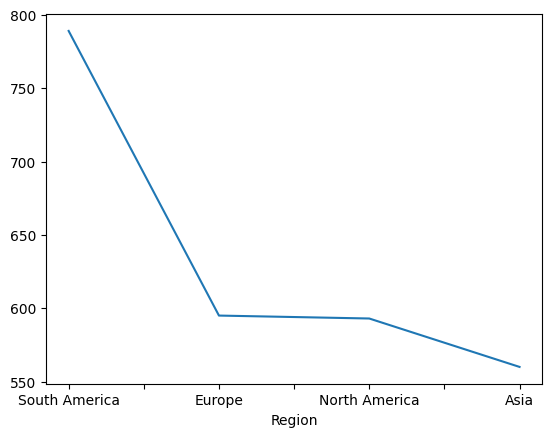

In [36]:
df[['Region', 'Quantity']].groupby('Region').sum().Quantity.sort_values(ascending = False).head(10).plot()

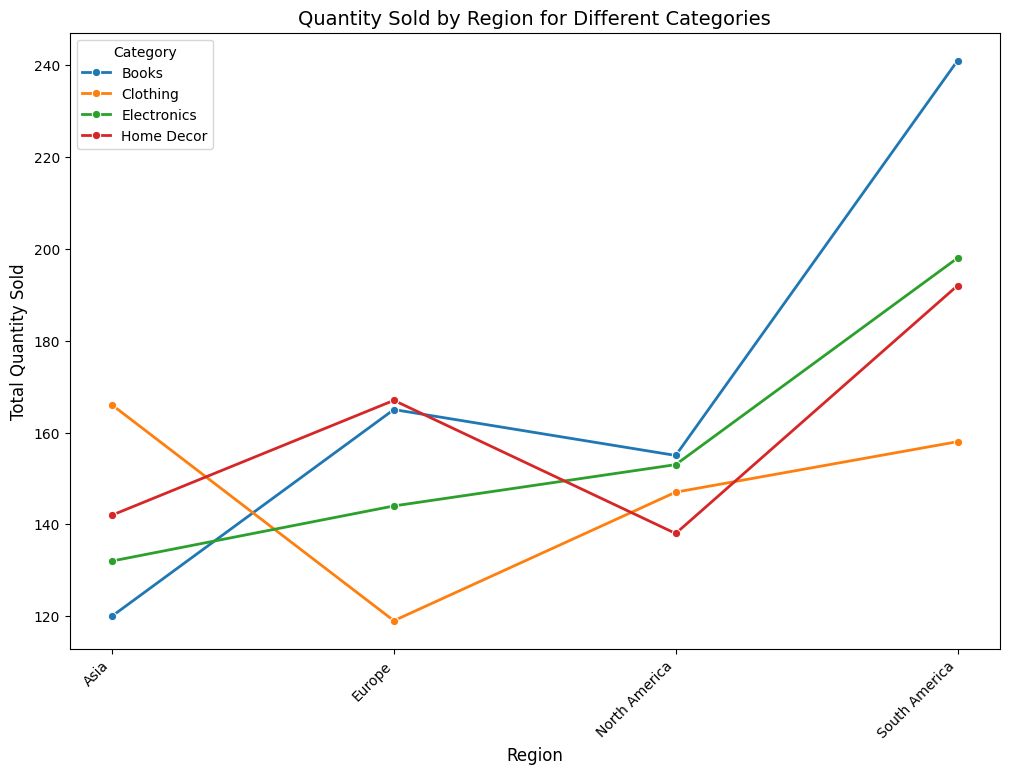

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume you have a 'Category' column that represents different categories for each region
# If not, you may need to adjust the code to reflect the actual column you're using
df_region_category = df[['Region', 'Quantity', 'Category']].groupby(['Region', 'Category']).sum().reset_index()

# Create a line plot with Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_region_category, x='Region', y='Quantity', hue='Category', marker='o', lw=2)

# Adding title and labels
plt.title('Quantity Sold by Region for Different Categories', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


### Products top

<Axes: xlabel='ProductName'>

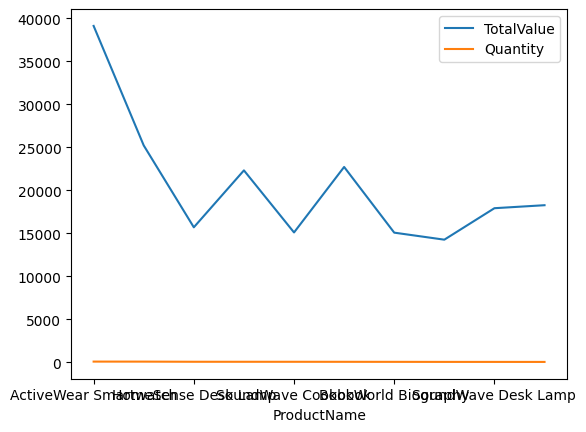

In [130]:
df[['ProductName', 'TotalValue', 'Quantity']].groupby('ProductName').sum().sort_values(by = 'Quantity', ascending = False).head(10).plot()

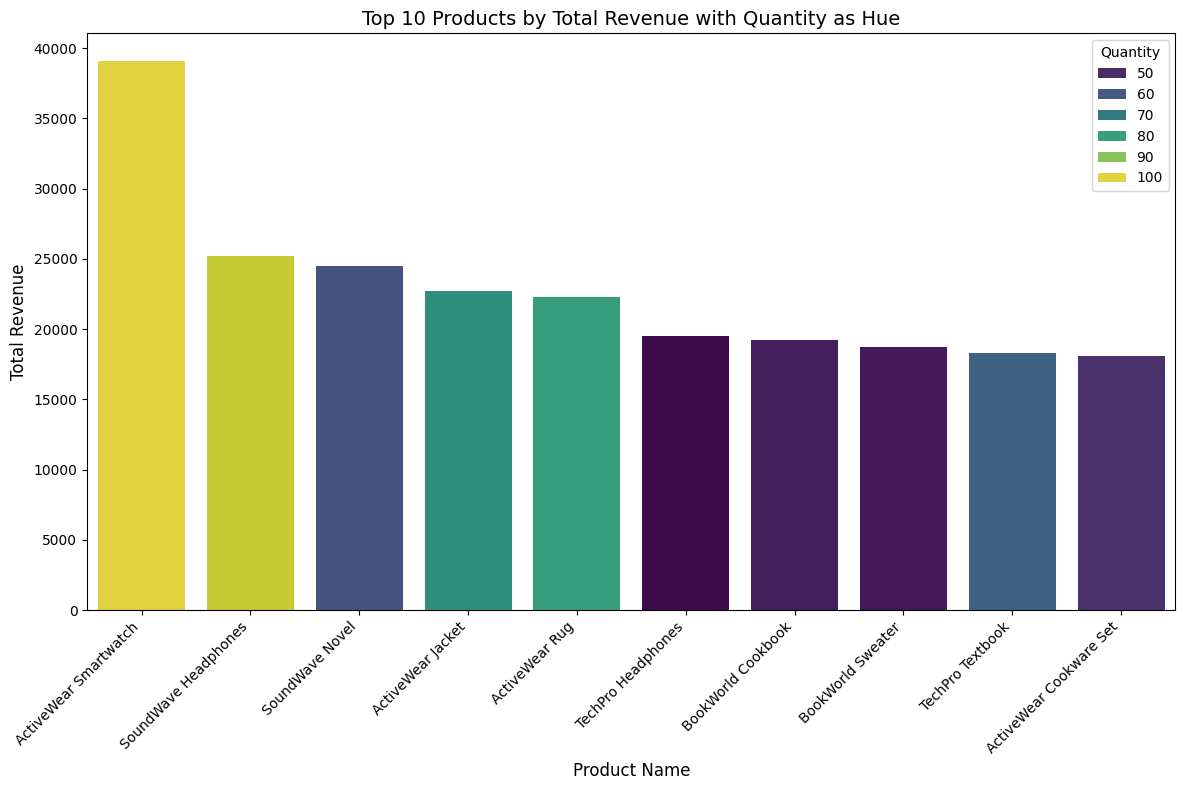

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by 'ProductName' and summing 'TotalValue' and 'Quantity'
df_product_summary = df[['ProductName', 'TotalValue', 'Quantity']].groupby('ProductName').sum().sort_values(by='TotalValue', ascending=False).head(10)

# Create the bar chart with 'TotalValue' as the Y-axis and 'ProductName' on the X-axis
plt.figure(figsize=(12, 8))

# Bar plot for 'TotalValue' with 'Quantity' as hue
sns.barplot(data=df_product_summary, x=df_product_summary.index, y='TotalValue', hue='Quantity', palette='viridis')

# Adding labels and title
plt.title('Top 10 Products by Total Revenue with Quantity as Hue', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotate the X-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()



Demand for Products Monthwise

In [22]:
df['Brand'] = df.ProductName.str.split().str.get(0)

In [29]:
df.ProductName.value_counts()

ProductName
ActiveWear Smartwatch          40
SoundWave Headphones           38
BookWorld Biography            30
ActiveWear Rug                 29
SoundWave Cookbook             29
                               ..
HomeSense Bluetooth Speaker     7
BookWorld Wall Art              7
SoundWave Laptop                7
SoundWave Bluetooth Speaker     7
SoundWave Jacket                5
Name: count, Length: 66, dtype: int64

In [33]:
df[df.ProductName.str.contains('Jacket')].ProductName.value_counts()

ProductName
ActiveWear Jacket    26
BookWorld Jacket     12
SoundWave Jacket      5
Name: count, dtype: int64

In [37]:
df['Product'] = df.ProductName.str.split().str.get(-1)


In [ ]:
df.drop(columns =)

In [41]:
df['Month'] = df['TransactionDate'].dt.month
df['Hour'] = df['TransactionDate'].dt.hour

In [42]:
df.TransactionDate = pd.to_datetime(df.TransactionDate)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   object        
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Brand            1000 non-null   object        
 13  Product          1000 non-null   object        
 14  Month            1000 non-null   int32   

In [43]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Brand,Product,Month,Hour
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,Speaker,8,12
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,Speaker,5,22
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,Speaker,4,7
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,Speaker,3,22
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,Speaker,3,15


In [45]:
df.to_csv('cleaned.csv', index=False)

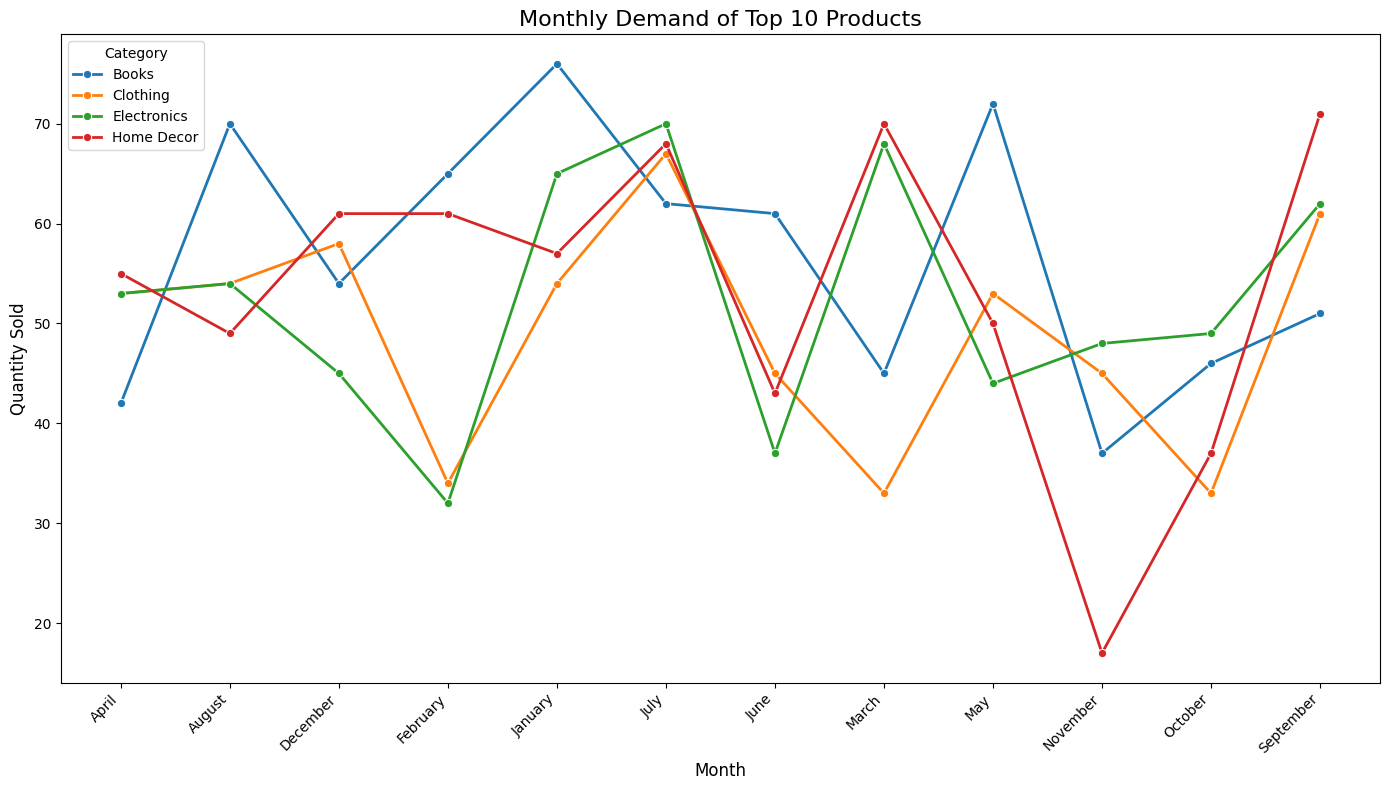

In [143]:
# Extract month and year from the 'Date' column
df['Month'] = df['TransactionDate'].dt.month_name()

# Group by 'Category' and 'Month', and sum the 'Quantity' for each group
df_monthly_demand = df.groupby(['Category', 'Month']).agg({'Quantity': 'sum'}).reset_index()

# Filter for top 10 products based on total revenue
top_10_products = df[['Category', 'TotalValue']].groupby('Category').sum().sort_values(by='TotalValue', ascending=False).head(10).index
df_monthly_demand_top10 = df_monthly_demand[df_monthly_demand['Category'].isin(top_10_products)]

# Create a line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_monthly_demand_top10, x='Month', y='Quantity', hue='Category', marker='o', lw=2)

# Adding title and labels
plt.title('Monthly Demand of Top 10 Products', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### The Brand Column

In [81]:
df["Brand"] = df.ProductName.str.split().str.get(0)

In [82]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Brand
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving


Country wise brand usage

In [89]:
for groups, data in df[['Region', 'Quantity','Brand']].groupby('Region'):
    print(groups, data.groupby('Brand').Quantity.sum())

Asia Brand
ActiveWear       142
BookWorld         75
ComfortLiving     65
HomeSense         98
SoundWave        118
TechPro           62
Name: Quantity, dtype: int64
Europe Brand
ActiveWear       130
BookWorld         93
ComfortLiving     71
HomeSense         84
SoundWave        135
TechPro           82
Name: Quantity, dtype: int64
North America Brand
ActiveWear       114
BookWorld         79
ComfortLiving     80
HomeSense        100
SoundWave        118
TechPro          102
Name: Quantity, dtype: int64
South America Brand
ActiveWear       218
BookWorld         67
ComfortLiving     72
HomeSense        111
SoundWave        173
TechPro          148
Name: Quantity, dtype: int64


Largest selling products

<Axes: xlabel='ProductName'>

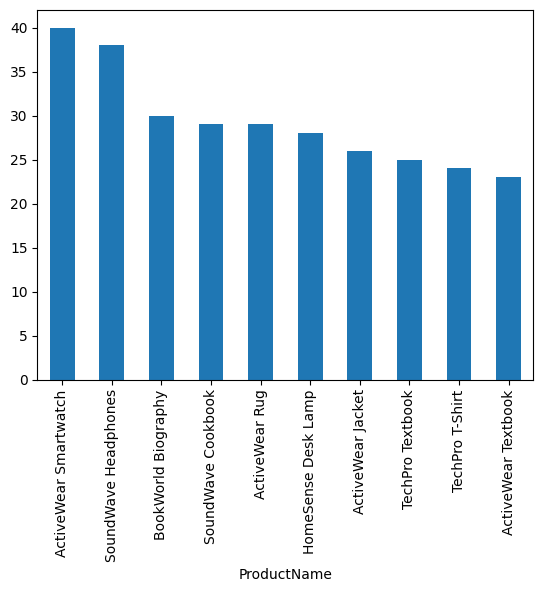

In [90]:
df.ProductName.value_counts().sort_values(ascending = False).head(10).plot(kind= 'bar')

Largest selling products qty wise

In [24]:
df[['ProductName', 'Quantity']].groupby('ProductName').sum().sort_values(by = 'Quantity', ascending = False).head(10)

,Quantity
ProductName,
ActiveWear Smartwatch,100
SoundWave Headphones,97
HomeSense Desk Lamp,81
ActiveWear Rug,79
SoundWave Cookbook,78
ActiveWear Jacket,76
BookWorld Biography,71
TechPro T-Shirt,66
SoundWave Desk Lamp,64


Largest selling products revenue wise

In [23]:
df[['ProductName', 'TotalValue']].groupby('ProductName').sum().sort_values(by = 'TotalValue', ascending = False).head(10)

,TotalValue
ProductName,
ActiveWear Smartwatch,39096.97
SoundWave Headphones,25211.64
SoundWave Novel,24507.90
ActiveWear Jacket,22712.56
ActiveWear Rug,22314.43
TechPro Headphones,19513.80
BookWorld Cookbook,19221.99
BookWorld Sweater,18743.79
TechPro Textbook,18267.96


In [92]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Brand
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving


In [93]:
df.TransactionDate

0      2024-08-25 12:38:23
1      2024-05-27 22:23:54
2       2024-04-25 7:38:55
3      2024-03-26 22:55:37
4      2024-03-21 15:10:10
              ...         
995     2024-10-24 8:30:27
996     2024-06-04 2:15:24
997    2024-04-05 13:05:32
998    2024-09-29 10:16:02
999    2024-04-21 10:52:24
Name: TransactionDate, Length: 1000, dtype: object

In [94]:
df.TransactionDate = pd.to_datetime(df.TransactionDate)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   object        
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Brand            1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 101.7+ KB


In [96]:
df['hour'] = df.TransactionDate.dt.hour

In [97]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Brand,hour
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,12
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,22
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,7
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,22
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,15


Lets check if we are getting anything or just wasting our time

<Axes: xlabel='hour'>

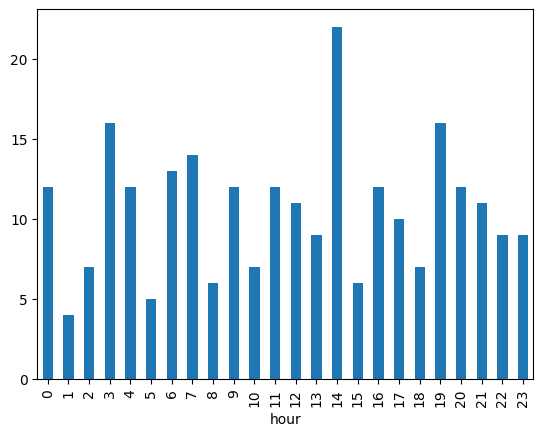

In [102]:
df[df.Category == 'Electronics'].hour.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='hour'>

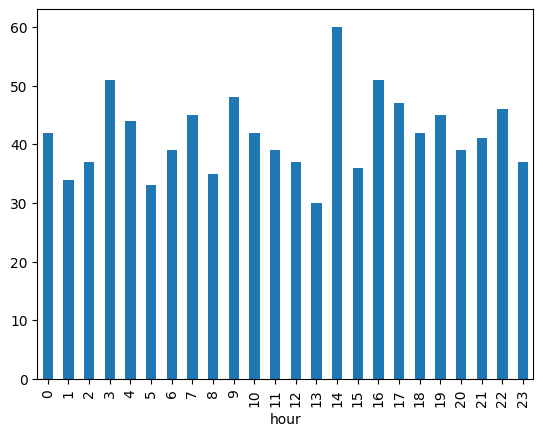

In [109]:
df.hour.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='hour'>

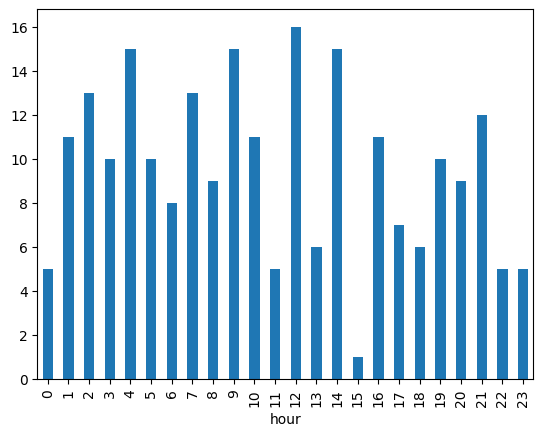

In [103]:
df[df.Category == 'Clothing'].hour.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='hour'>

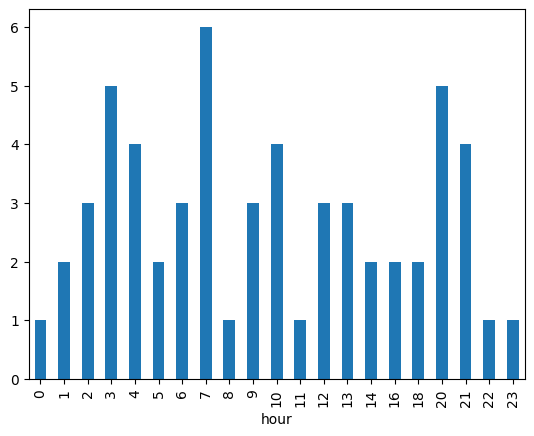

In [108]:
df[(df.Category == 'Clothing') & (df.Region == 'Asia')].hour.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='hour'>

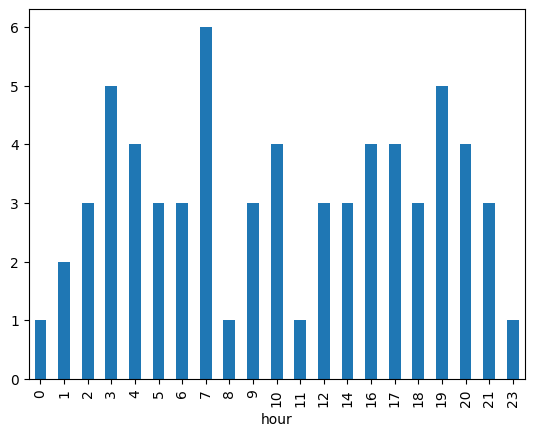

In [ ]:

df[(df.Category == 'Clothing') & (df.Region == 'Europe')].hour.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='hour'>

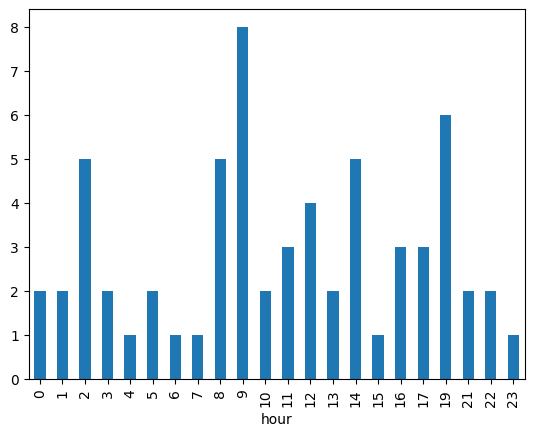

In [110]:

df[(df.Category == 'Clothing') & (df.Region == 'South America')].hour.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='hour'>

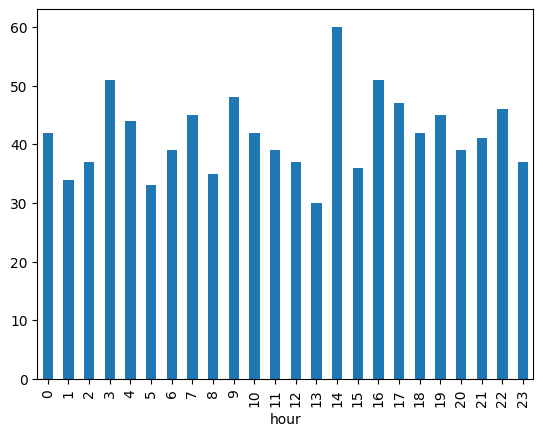

In [101]:
df.hour.value_counts().sort_index().plot(kind='bar')

In [144]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Brand,hour,Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,12,August
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,22,May
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,7,April
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,22,March
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,ComfortLiving,15,March


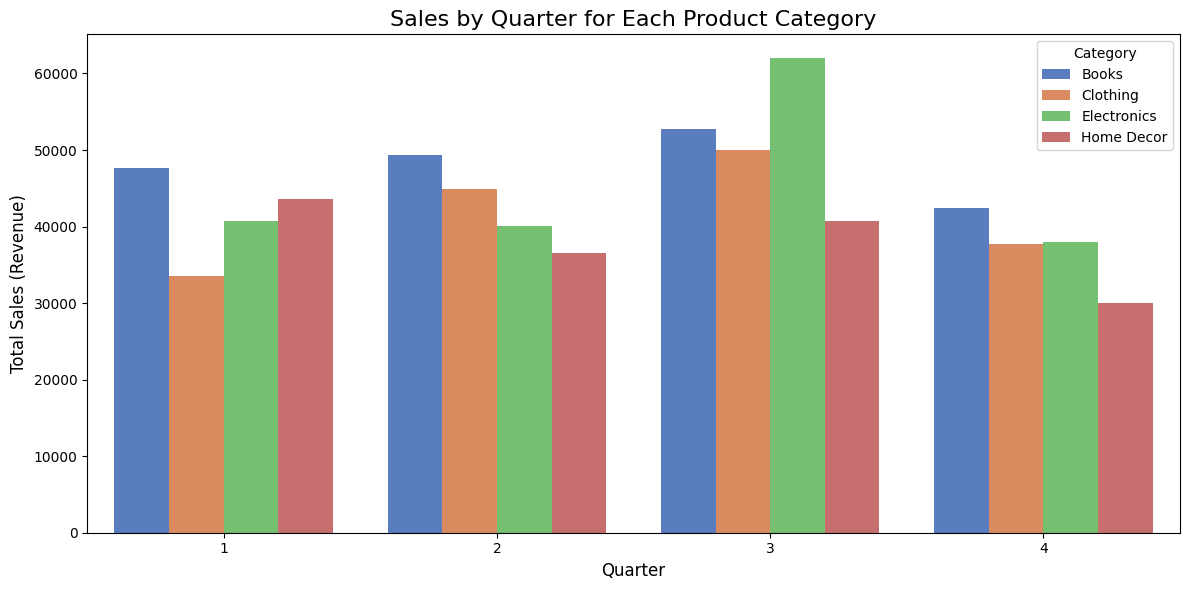

In [149]:
# Extract quarter from 'TransactionDate' (Q1, Q2, Q3, Q4)
df['Quarter'] = df['TransactionDate'].dt.quarter

# Group by 'Quarter' and 'ProductCategory' and calculate total sales ('TotalValue')
sales_by_quarter_category = df.groupby(['Quarter', 'Category']).agg({'TotalValue': 'sum'}).reset_index()

# Plotting the sales by quarter and category
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_quarter_category, x='Quarter', y='TotalValue', hue='Category', palette='muted')

# Adding labels and title
plt.title('Sales by Quarter for Each Product Category', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales (Revenue)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [1]:
df.head()

NameError: name 'df' is not defined